In [2]:
#import packages
import pandas as pd\

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
#data import and preparation
email_info = pd.read_csv('email_table.csv')
email_open = pd.read_csv('email_opened_table.csv')
email_click = pd.read_csv('link_clicked_table.csv')
email_open['email_open'] = 1
email_click['email_click']= 1
email_info.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


In [4]:
data = email_info.merge(email_open,how='left',on = 'email_id')
data.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_open
0,85120,short_email,personalized,2,Sunday,US,5,NaN
1,966622,long_email,personalized,12,Sunday,UK,2,1.0
2,777221,long_email,personalized,11,Wednesday,US,2,NaN
3,493711,short_email,generic,6,Monday,UK,1,NaN
4,106887,long_email,generic,14,Monday,US,6,NaN


In [5]:
data = data.merge(email_click,how='left',on = 'email_id')
data.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_open,email_click
0,85120,short_email,personalized,2,Sunday,US,5,NaN,NaN
1,966622,long_email,personalized,12,Sunday,UK,2,1.0,1.0
2,777221,long_email,personalized,11,Wednesday,US,2,NaN,NaN
3,493711,short_email,generic,6,Monday,UK,1,NaN,NaN
4,106887,long_email,generic,14,Monday,US,6,NaN,NaN


#### What percentage of users opened the email and what percentage clicked on the link within the email?

In [6]:
total_people = len(data)
open_people = data[['email_open']].notnull().sum()[0]
click_people = data[['email_click']].notnull().sum()[0]
print('About',round(open_people*100/total_people,2),'% opened the email')
print('About',round(click_people/open_people*100,2),'% clicked the link after they opened the email')

About 10.34 % opened the email
About 20.48 % clicked the link after they opened the email


#### The VP of marketing thinks that it is stupid to send emails to a random subset and in a random way. Based on all the information you have about the emails that were sent, can you build a model to optimize in future email campaigns to maximize the probability of users clicking on the link inside the email?

In [7]:
data_Q2 = data[['email_text','email_version','hour','weekday','user_country','user_past_purchases','email_click']]
data_Q2['email_click'] = data_Q2[['email_click']].fillna(0)
data_Q2.head()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_click
0,short_email,personalized,2,Sunday,US,5,0.0
1,long_email,personalized,12,Sunday,UK,2,1.0
2,long_email,personalized,11,Wednesday,US,2,0.0
3,short_email,generic,6,Monday,UK,1,0.0
4,long_email,generic,14,Monday,US,6,0.0


In [8]:
data_Q2_dummy = pd.get_dummies(data_Q2)
data_Q2_dummy.head()

,hour,user_past_purchases,email_click,email_text_long_email,email_text_short_email,email_version_generic,email_version_personalized,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,user_country_ES,user_country_FR,user_country_UK,user_country_US
0,2,5,0.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1
1,12,2,1.0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,11,2,0.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,6,1,0.0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0
4,14,6,0.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [9]:
X = data_Q2_dummy.copy().drop('email_click', axis=1)
Y = data_Q2_dummy.copy()['email_click']

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.7, random_state=2020)
# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) 
X_train_scaled = scl_obj.transform(X_train) 
X_test_scaled = scl_obj.transform(X_test)

In [11]:
#LogisticRegression
lm = LogisticRegression()  # 笔记：如果不做hyper tunning的话，这里的variable会出现overfit的现象
lm.fit(X_train_scaled,y_train)
lm_predict = lm.predict(X_test_scaled)
lm1_r2 = r2_score(y_test, lm_predict)
print(lm1_r2)

-0.021405746136897275


In [12]:
acc_score = accuracy_score(y_test, lm_predict)
print('linear SVM accuracy result:',acc_score)

linear SVM accuracy result: 0.9790428571428571


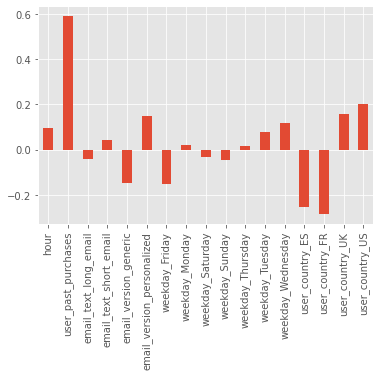

In [13]:
plt.style.use('ggplot')

weights = pd.Series(lm.coef_[0], index = X.columns)
weights.plot(kind='bar')
plt.show()

The takeaway in here is user_past_purchase and email_version_personalized are the two important factors in general to let people click. Furthermroe, people from US and UK are generally more likely to click as well. 

#### Did you find any interesting pattern on how the email campaign performed for different segments of users? Explain.

In [14]:
data[['email_open','email_click']]=data[['email_open','email_click']].fillna(0)

In [16]:
graph1 = data[['hour','user_country','email_click']].groupby('user_country').mean().reset_index().sort_values(by='email_click',ascending=False)
graph1

,user_country,hour,email_click
2,UK,9.042128,0.024675
3,US,9.067605,0.024360
0,ES,9.075148,0.008327
1,FR,9.027814,0.008004


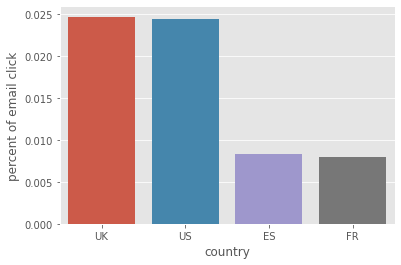

In [17]:
graph1_plot = sns.barplot(x='user_country',y='email_click',data=graph1)
plt.xlabel('country')
plt.ylabel('percent of email click')
plt.show(graph1_plot)

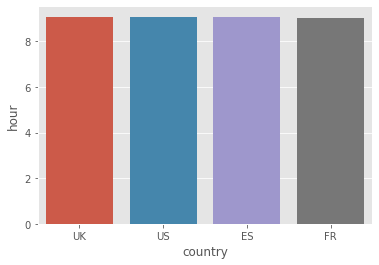

In [19]:
graph2_plot = sns.barplot(x='user_country',y='hour',data=graph1)
plt.xlabel('country')
plt.ylabel('hour')
plt.show(graph2_plot)